In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings 
warnings.filterwarnings('ignore')

선형판별분석(Linear Discriminant Analysis,LDA) 는 사실 분류 알고리즘입니다. 

훈련 과정에서 클래스 사이를 가장 잘 구분하는 축을 학습합니다. 이 축은 데이터가 투영되는 초평면을 정의하는 데 사용할 수 있습니다.

이 알고리즘의 장점은 투영을 통해 가능한 한 클래스를 멀리 떨어지게 유지시키므로 SVM 분류기 같은 다른 분류알고리즘을 적용하기 전에 차원을 축소시키는 데 좋습니다.

정규분포를 따르는 N개 데이터가 k개 범주로 구성돼 있는 p차원(변수 개수=p개)의 데이터 X의 평균과 공분산은 각각 아래와 같습니다. <br>
평균벡터의 요소는 각각 변수 관측치의 평균입니다. 예컨대 μ1은 데이터 첫번째 변수의 평균입니다. <br>
마찬가지로 공분산행렬의 요소는 각각 변수 관측치의 공분산입니다. σ12는 첫번째 변수와 두번째 변수의 공분산, 즉 cov(X1,X2)입니다.

$$
\begin{align*}
\mu_k =\begin{bmatrix} { \mu  }_{ 1 } \\ ... \\ { \mu  }_{ p } \end{bmatrix} &,\ \ \mu_{k,i} = \dfrac{1}{ |\{i:y_i = k\}| } \sum_{i:y_{k}=k}X_i \\
\\
\Sigma =\begin{bmatrix} { \sigma  }_{ 11 } & ... & { \sigma  }_{ 1p } \\ ... & ... & ... \\ { \sigma  }_{ p1 } & ... & { \sigma  }_{ pp } \end{bmatrix} &, \ \ \Sigma = \dfrac{1}{n} \sum^{K-1}_{k=0}\sum_{y_i=k}(x_i - \mu_k)(x_i-\mu_k)^T
\end{align*}
$$

위 두 개 파라메터만 알고 있으면 아래와 같이 이미 정의돼 있는 다변량 정규분포 확률함수로 P(x|Wi)를 구할 수 있게 됩니다.<br>
그렇다면 P(x|Wi)의 의미는 무엇일까요? 범주정보가 주어졌을 때(=정답 범주를 알고 있을 때=학습할 때) x가 나타날 확률, 즉 학습데이터 내에 있는 Wi의 분포가 됩니다. <br>P(x|Wi)는 다음과 같습니다. (p는 데이터 변수 개수)

$$
P(X=x|{ W }_{ i })=P(x|{ W }_{ i })=\frac { 1 }{ { (2\pi ) }^{ p/2 }{ \left| { \Sigma  }_{ i } \right|  }^{ 1/2 } } exp\left[ -\frac { 1 }{ 2 } { (x-{ \mu  }_{ i }) }^{ T }{ { \Sigma  }_{ i } }^{ -1 }(x-{ \mu  }_{ i }) \right]
$$

판별함수 σ는 새로운 데이터 x에 대해 범주(클래스)를 할당해주는 역할을 하는데요, 범주 개수(k개)만큼의 판별함수가 필요하게 됩니다.<br>
새로운 데이터에 대해 가장 큰 확률값을 내어주는 범주로 분류하게 됩니다. 판별함수 식은 아래와 같습니다.

$$
\begin{align*}
{ \sigma  }_{ i }(x) &= P({ W }_{ i }|x)\\ 
&\propto P(x|{ W }_{ i })P({ W }_{ i })\\ 
&\propto \ln { P(x|{ W }_{ i }) } +\ln { P( W }_{ i }) \\
\end{align*}
$$

위의 판별함수 계산에서 유의할 부분은 P(x)를 나눠주는 부분을 생략해도 된다는 점입니다. <br>
k개 판별함수의 분모는 P(x)로 동일하고, 범주 예측엔 판별함수 결과값 크기만 중요하기 때문에 분모를 생략해 계산상 이득을 취하기 위해서입니다. <br>
이 식에 자연로그를 취해도 판별함수 간 크기는 달라지지 않기 때문에 계산상 편의를 위해 로그변환을 한 것이 위 식 마지막 결과입니다.

위 식 P(x|Wi)에 다변량 정규분포의 확률함수를 대입해 정리하면 아래와 같습니다. 
$$
\begin{align*}
\ln { P(x|{ W }_{ i }) } &= \ln { \frac { 1 }{ { (2\pi ) }^{ p/2 }{ \left| { \Sigma  }_{ i } \right|  }^{ 1/2 } }  } -\frac { 1 }{ 2 } { (x-{ \mu  }_{ i }) }^{ T }{ { \Sigma  }_{ i } }^{ -1 }(x-{ \mu  }_{ i })\\ 
&=\ln { \frac { 1 }{ { (2\pi ) }^{ p/2 } }  } +\ln { \frac { 1 }{ { \left| { \Sigma  }_{ i } \right|  }^{ 1/2 } }  } -\frac { 1 }{ 2 } { (x-{ \mu  }_{ i }) }^{ T }{ { \Sigma  }_{ i } }^{ -1 }(x-{ \mu  }_{ i })\\ 
&=-\frac { p }{ 2 } \ln { 2\pi  } -\frac { 1 }{ 2 } \ln { \left| { \Sigma  }_{ i } \right|  } -\frac { 1 }{ 2 } { (x-{ \mu  }_{ i }) }^{ T }{ { \Sigma  }_{ i } }^{ -1 }(x-{ \mu  }_{ i })
 \end{align*}
$$

위 식을 자세히 보시면 미지수가 하나도 없는 상수라는 점을 확인할 수 있습니다.<br>
데이터 x는 물론 변수 개수인 p, π, Σ, 평균까지 이미 우리가 다 알고 있는 값들이기 때문입니다.<br>
이 값들을 위 식에 넣어서 계산하기만 하면 P(x|Wi)를 바로 구할 수 있습니다. <br>
한편 나머지 P(Wi)는 i번째 범주의 개체 수를 전체 데이터 수로 나눠서(Ni/N) 바로 구할 수 있습니다.

그럼 이제 결정경계(decision boundary)를 살펴보겠습니다. 범주가 두 개일 때를 예를 들어보죠.<br>
판별함수 σ1과 σ2의 값이 같은 지점이 바로 분류 경계면이 될 겁니다.<br>
σ1이 조금이라도 크면 W1 범주, 반대 상황이면 W2 범주로 분류되기 때문입니다.<br>
이를 위 식을 기준으로 넣어서 정리하면 아래와 같은 식이 됩니다.

$$ 
\begin{align*}
{ \sigma  }_{ 1 }(x)-{ \sigma  }_{ 2 }(x)&=0\\
-\frac { p }{ 2 } \ln { 2\pi  } -\frac { 1 }{ 2 } \ln { \left| { \Sigma  }_{ 1 } \right|  } -\frac { 1 }{ 2 } { (x-{ \mu  }_{ 1 }) }^{ T }{ { \Sigma  }_{ 1 } }^{ -1 }(x-{ \mu  }_{ 1 })+\ln { P({ W }_{ 1 }) } \\-(-\frac { p }{ 2 } \ln { 2\pi  } -\frac { 1 }{ 2 } \ln { \left| { \Sigma  }_{ 2 } \right|  } -\frac { 1 }{ 2 } { (x-{ \mu  }_{ 2 }) }^{ T }{ { \Sigma  }_{ 2 } }^{ -1 }(x-{ \mu  }_{ 2 })+\ln { P({ W }_{ 2 }) } )&=0\\
{ (x-{ \mu  }_{ 1 }) }^{ T }{ { \Sigma  }_{ 1 } }^{ -1 }(x-{ \mu  }_{ 1 })-{ (x-{ \mu  }_{ 2 }) }^{ T }{ { \Sigma  }_{ 2 } }^{ -1 }(x-{ \mu  }_{ 2 })-\ln { \frac { \left| { \Sigma  }_{ 2 } \right|  }{ \left| { \Sigma  }_{ 1 } \right|  }  } +2\ln { \frac { P({ W }_{ 1 }) }{ P({ W }_{ 2 }) }  } &=0
\end{align*}
$$

뭔가 식이 엄청 복잡해보이죠? 일단은 범주 각각의 분산이 동일하다고 가정해보겠습니다. <br>
그러면 둘의 분산은 합동분산(pooled variance) 공식에 의해 아래와 같이 같이 쓸 수 있습니다

$$
\begin{align*}
{ \Sigma  }_{ 1 }={ \Sigma  }_{ 2 }={ \Sigma  }&=\left[ \frac { { n }_{ 1 }-1 }{ ({ n }_{ 1 }-1)+({ n }_{ 2 }-1) }  \right] { \Sigma  }_{ 1 }+\left[ \frac { { n }_{ 2 }-1 }{ ({ n }_{ 1 }-1)+({ n }_{ 2 }-1) }  \right] { \Sigma  }_{ 2 } \\
\Sigma &= \dfrac{(n_1 - 1)\Sigma_1 + (n_2-1)\Sigma_2}{n_1+n_2-2}
\end{align*}
$$

이를 판별함수 식에 넣어 정리하면 아래와 같습니다.


$$
\begin{align*}
(x-\mu_1)^2\Sigma - (x-\mu_2)^2\Sigma^{-1} + 
2\ln { \frac { P({ W }_{ 1 }) }{ P({ W }_{ 2 }) }  } &=0\\
(x^2-2x\mu_1+\mu_1^2 - x^2 + 2x\mu_2 - \mu_2^2)\Sigma^{-1} +
2\ln { \frac { P({ W }_{ 1 }) }{ P({ W }_{ 2 }) }  } &=0\\
(-2x(\mu_1-\mu_2) + \mu_1^2 - \mu_2^2)\Sigma^{-1} +
2\ln { \frac { P({ W }_{ 1 }) }{ P({ W }_{ 2 }) }  } &=0\\
(-2x(\mu_1-\mu_2) + (\mu_1-\mu_2)(\mu_1+\mu_2))\Sigma^{-1} +
2\ln { \frac { P({ W }_{ 1 }) }{ P({ W }_{ 2 }) }  } &=0\\
-2x(\mu_1-\mu_2)\Sigma^{-1} + (\mu_1-\mu_2)(\mu_1+\mu_2)\Sigma^{-1} +
2\ln { \frac { P({ W }_{ 1 }) }{ P({ W }_{ 2 }) }  } &=0 \\
{ { (\mu  }_{ 1 }-{ \mu  }_{ 2 }) }^{ T }{ \Sigma  }^{ -1 }x-\frac { 1 }{ 2 } { { (\mu  }_{ 1 }-{ \mu  }_{ 2 }) }^{ T }{ \Sigma  }^{ -1 }{ { (\mu  }_{ 1 }+{ \mu  }_{ 2 }) }-\ln { \frac { P({ W }_{ 1 }) }{ P({ W }_{ 2 }) }  } &=0
\end{align*}
$$

위 식은 복잡해보이지만 자세히 뜯어보면 Ax+b=0의 선형식(linear equation)이 됩니다. <br>
x를 제외하면 미지수가 전혀 없는 상수항이기 때문입니다. 결정경계가 직선 모양이라는 뜻인데요. <br>
이 상수항들은 모두 학습데이터의 패턴이 녹아들어 있는 결과입니다. <br>
위 식에 x를 넣어 0보다 큰 값이 나오면 W1 범주, 그렇지 않으면 W2 범주로 분류하는 방식입니다.

한편 Σ1과 Σ2가 각각 다르다고 놓고 풀면 아래와 같은 식이 됩니다.
$$
-\frac { 1 }{ 2 } { x }^{ T }({ { \Sigma  }_{ 1 } }^{ -1 }-{ { \Sigma  }_{ 2 } }^{ -1 })x+({ \mu  }_{ 1 }{ { \Sigma  }_{ 1 } }^{ -1 }+{ \mu  }_{ 2 }{ { \Sigma  }_{ 2 } }^{ -1 })x-\frac { 1 }{ 2 } ({ \mu  }_{ 1 }^{ 2 }{ { \Sigma  }_{ 1 } }^{ -1 }-{ \mu  }_{ 2 }^{ 2 }{ { \Sigma  }_{ 1 } }^{ -1 })+\frac { 1 }{ 2 } \ln { \frac { \left| { \Sigma  }_{ 2 } \right|  }{ \left| { \Sigma  }_{ 1 } \right|  }  } -\ln { \frac { P({ W }_{ 1 }) }{ P({ W }_{ 2 }) }  } =0
$$

위 식도 자세히 보면 Ax2+bx+c=0의 2차식 형태입니다. 따라서 결정경계는 곡선 형태가 됩니다.

In [2]:
from sklearn.datasets import load_iris

In [353]:
iris = load_iris()
X = iris.data[:, [2, 3]]
y = (iris.target==2).astype(int)
n0 = 100
n1 = 50

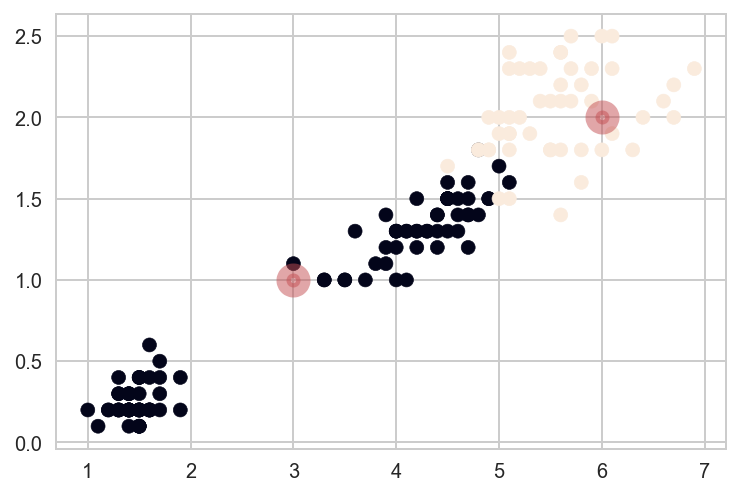

In [354]:
plt.scatter(X[:, 0], X[:, 1], c= y)
plt.scatter(3, 1, c='r', lw=10, alpha=0.5)
plt.scatter(6, 2, c='r', lw=10, alpha=0.5)

In [355]:
np.bincount(y)

array([100,  50])

In [356]:
np.unique(y)

array([0, 1])

In [357]:
mu0 = np.mean(X[y==0], axis=0)
mu1 = np.mean(X[y==1], axis=0)

In [358]:
v0 = X[y==0]-mu0
v0 = v0.T.dot(v0)

v1 = X[y==1]-mu1
v1 = v1.T.dot(v1)

In [359]:
tv = ((n0-1)*v0 + (n1-1)*v1) / (n0 + n1 - 2)
tv

array([[143.89959189,  53.96645   ],
       [ 53.96645   ,  22.46024527]])

In [360]:
tv = ((X[y==0] - mu0).T.dot((X[y==0] - mu0)) +\
(X[y==1] - mu1).T.dot((X[y==1] - mu1))) * 1/150
tv

array([[1.48440267, 0.54590267],
       [0.54590267, 0.23629133]])

In [361]:
class mylda():
    def __init__(self):
        self.means = [] 
        self.covariance_ = [] 
        self.covariance = 0
        self.classes = 0
        self.classes_count = []
    
    def fit(self,X, y):
        self.classes = np.unique(y)
        
        for cls in self.classes:
            
            x = X[y==cls]
            mu = np.mean(x, axis=0)
            
            v = x-mu
            v = v.T.dot(v)
            
            self.classes_count.append(len(x))
            self.covariance += (x-mu).T.dot(x-mu)
            self.covariance_.append(v)
            self.means.append(mu)
        
        self.covariance *= 1/(len(y))
    def predict(self, x):
        
        mu = self.means[0]
        b = 1/2 * mu.dot(np.linalg.inv(self.covariance)).dot(mu)
        for idx in range(1, len(self.means)):
            mu -= self.means[idx]
            b -= 1/2 * self.means[idx].dot(np.linalg.inv(self.covariance)).dot(self.means[idx])
            
        w = np.linalg.inv(self.covariance).dot(mu)
        
        print(w)
        print(b)
        res = []
        tn = sum(self.classes_count) 
        for i, n in enumerate(self.classes_count):
            for j, sub_n in enumerate(self.classes_count):
                if i==j:
                    continue
                    
                print(i, j)
                c = np.log( (n/tn)/(sub_n/tn))
                
                r = w.dot(x.T) + b + c
                res.append(r)
                
        
        return res #w.dot(x.T) + b + c

In [362]:
lda = mylda()
lda.fit(X, y)

In [363]:
lda.predict(np.array([3, 1]))

[ 0.79332809 -7.08481304]
-6.620173456316314
0 1
1 0


[-10.631855048064793, -12.018149409184684]

In [364]:
def fun1(x):
    w = np.linalg.inv(tv).dot(mu1-mu0)
    w = w.reshape(1, 2)
    b1 = 1/2 * mu0.dot(np.linalg.inv(tv)).dot(mu0)
    b2 = 1/2 * mu1.dot(np.linalg.inv(tv)).dot(mu1)
    b3 = np.log( (n1/(n0+n1))/(n0/(n0+n1)) )

    print(w)
    print(b1-b2)
    return w.dot(x.T) + b1 - b2 + b3

In [365]:
x_new = np.array([3, 1])
fun1(x_new)

[[-0.79332809  7.08481304]]
-6.620173456316314


array([-2.60849186])

In [366]:
x_new = np.array([6, 2])
fun1(x_new)

[[-0.79332809  7.08481304]]
-6.620173456316314


array([2.09633691])

[[-0.79332809  7.08481304]]
-6.620173456316314


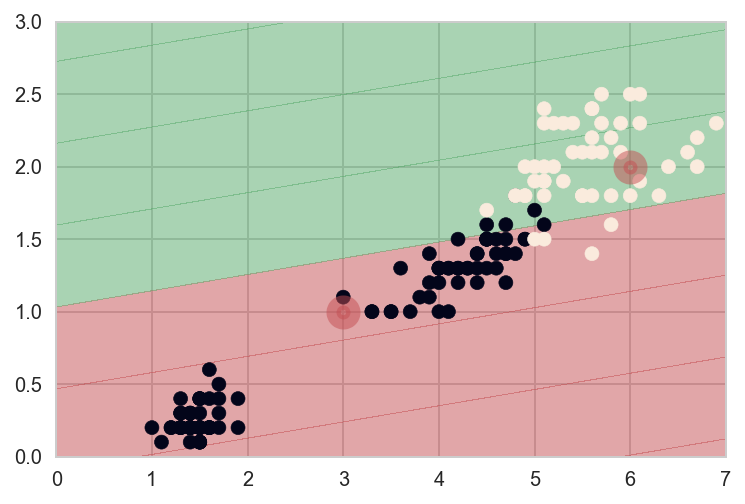

In [367]:
XX, YY = np.meshgrid(np.linspace(0, 7, 100), 
                     np.linspace(0, 3, 100))
x_new = np.c_[XX.ravel(), YY.ravel()]
ZZ = fun1(x_new).reshape(XX.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g"]).as_hex())

plt.contourf(XX, YY, ZZ, alpha=0.5, cmap=cmap)

plt.scatter(X[:, 0], X[:, 1], c= y)
plt.scatter(3, 1, c='r', lw=10, alpha=0.5)
plt.scatter(6, 2, c='r', lw=10, alpha=0.5)